# Exploring the NCBI viral database 
###May 2017 | Gita Mahmoudabadi

4% done.
4% done.
7% done.
11% done.
15% done.
19% done.
22% done.
26% done.
30% done.
33% done.
33% done.
37% done.
41% done.
44% done.
48% done.
52% done.
56% done.
59% done.
59% done.
63% done.
67% done.
67% done.
70% done.
70% done.
74% done.
78% done.
78% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
81% done.
85% done.
89% done.
89% done.
0/2399
1/2399
2/2399
3/2399
4/2399
5/2399
6/2399
7/2399
8/2399
9/2399
10/2399
11/2399
12/2399
13/2399
14/2399
15/2399
16/2399
17/2399
18/2399
19/2399
20/2399
21/2399
22/2399
23/2399
24/2399
25/2399
26/2399
27/2399
28/2399
29/2399
30/2399
31/2399
32/2399
33/2399
34/2399
35/2399
36/2399
37/2399
38/2399
39/2399
40/2399
41/2399
42/2399
43/2399
44/2399
45/2399
46/2399
47/2399
48/2399
49/2399
50/2399
51/2399
52/2399
53/2399
54/2399
55/2399
56/2399
57/2399
58/2399
59/2399
60/2399
61/2399
62/2399
63/2399
64/2399
65/2399
66/2399
67/2399
68/2399
69/2399
70/2399
71/23

/Users/Gita/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


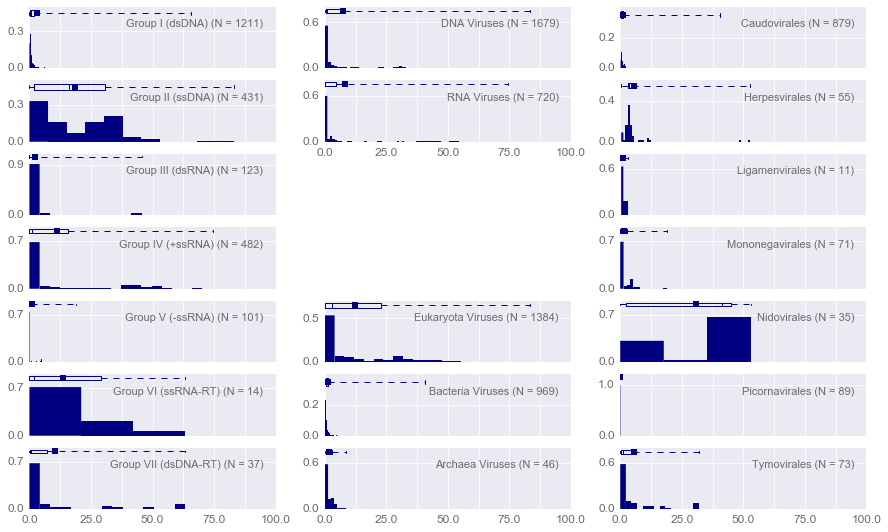

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ete3 as ete
import os
import Bio
import random
import scipy.stats as stats
import sklearn
from functools import *
from Bio import Entrez
from Bio import SeqIO
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_context("paper")
%matplotlib inline

#this portion is actually calculating percent Overlap in viral genomes, which we thought would be interesting to include.
#This code needs to run for subsequent parts to run. 

#filename that will be the name of both the stat text file and the plot. 
filename = 'percentOverlap'
inputFileNameTXT = filename + '.txt'
fo = open(inputFileNameTXT, 'w')
#writing the first line here, and the rest as part of the for loop 
fo.write('\t'+'Genome Overlap Statistics For Different Viral Groups (% overlap)'+'\n')
fo.write('\t'+ 'Min' +'\t'+ 'Max' + '\t'+ '25th Percentile'+'\t'+ 'Median'+ '\t' + '75th Percentile' +'\t' + 'Mean' + '\t' +'Stdev.' +'\n')

#as part of quality control the following viruses had to be omitted from our analysis
#they contain misannotations or mislabeled hosts, etc. 
badFolders = ['Acyrthosiphon_pisum_secondary_endosymbiont_phage_1_uid14047', 'Aureococcus_anophagefferens_virus_MM_2014_uid258005', 'Dragonfly_associated_microphage_1_uid177547', 'Enterobacter_phage_PG7_uid240014', 'Escherichia_phage_vB_EcoM_JS09_uid248321', 'Lactobacillus_phage_LL_H_uid19803', 'Providencia_phage_Redjac_uid177540', 'Pseudoalteromonas_phage_RIO_1_uid206039', 'Sputnik_virophage_2_uid243067', 'Sputnik_virophage_3_uid243065', 'Staphylococcus_phage_6ec_uid253318', 'Streptococcus_phage_DCC1738_uid253219', 'Streptococcus_phage_IC1_uid253220', 'Streptococcus_phage_K13_uid253223', 'Streptococcus_phage_SMP_uid18529', 'Vibrio_phage_CP_T1_uid181062', 'Vibrio_phage_vpms1_uid212709', 'Vibrio_phage_VPUSM_8_uid227006',  'Abaca_bunchy_top_virus_uid28697','Shallot_yellow_stripe_virus_uid15745','Equine_rhinitis_A_virus_uid15205','African_pouched_rat_arterivirus_uid274797','Spilanthes_yellow_vein_virus_uid19779', 'Velvet_bean_severe_mosaic_virus_uid41175','Paramecium_bursaria_Chlorella_virus_FR483_uid18305','Human_endogenous_retrovirus_K113_uid222261','Acholeplasma_phage_MV_L1_uid14573']

#viruses whose lineage is improperly annotated (they don't belong to any Baltimore group)
unknowns= ['Bacillus_phage_phBC6A51_uid15021', 'Bacillus_phage_phBC6A52_uid15022', 'Badger_feces_associated_gemycircularvirus_uid281125', 'Chaetoceros_DNA_virus_7_uid237558', 'Chaetoceros_lorenzianus_DNA_Virus_uid63565', 'Chaetoceros_tenuissimus_DNA_virus_uid60753', 'Cladosporium_cladosporioides_virus_1_uid258308', 'Enterobacteria_phage_YYZ_2008_uid32231', 'European_mountain_ash_ringspot_associated_virus_uid39973', 'Faecal_associated_gemycircularvirus_3_uid268557', 'Faecal_associated_gemycircularvirus_4_uid268556', 'Faecal_associated_gemycircularvirus_5_uid268555', 'Faecal_associated_gemycircularvirus_6_uid268554', 'Faecal_associated_gemycircularvirus_7_uid268553', 'Gentian_ovary_ring_spot_virus_uid256090', 'Geobacillus_virus_E2_uid19797', 'Glossina_pallidipes_salivary_gland_hypertrophy_virus_uid28839', 'Haloarcula_hispanica_icosahedral_virus_2_uid109269', 'Haloarcula_phage_SH1_uid15535', 'Halovirus_PH1_uid196975', 'Halovirus_VNH_1_uid262927', 'Human_genital_associated_circular_DNA_virus_1_uid281399', 'Lactobacillus_johnsonii_prophage_Lj771_uid28145', 'Magnaporthe_oryzae_RNA_virus_uid272442', 'Mongoose_feces_associated_gemycircularvirus_a_uid281407', 'Mongoose_feces_associated_gemycircularvirus_b_uid281406', 'Mongoose_feces_associated_gemycircularvirus_c_uid281404', 'Mongoose_feces_associated_gemycircularvirus_d_uid281405', 'Mycoplasma_phage_phiMFV1_uid14387', 'Penicillium_roqueforti_dsRNA_mycovirus_1_uid258162', 'Phage_Gifsy_1_uid32269', 'Phage_Gifsy_2_uid32271', 'Pigeonpea_cryptic_virus_uid244664', 'Planaria_asexual_strain_specific_virus_like_element_type_1_uid14140', 'Pseudomonas_phage_phi_Pto_bp6g_uid240724', 'Rhizoctonia_fumigata_mycovirus_uid283068', 'Rhodococcus_phage_REQ2_uid81171', 'Rhodococcus_phage_REQ3_uid81175', 'Rose_rosette_virus_uid64937', 'Rosellinia_necatrix_fusarivirus_1_uid255787', 'Rosellinia_necatrix_megabirnavirus_1_W779_uid41609', 'Salisaeta_icosahedral_phage_1_uid167575', 'Salmonella_phage_Fels_1_uid29267', 'Sodalis_phage_phiSG1_uid16583', 'Staphylococcus_phage_phi2958PVL_uid32173', 'Staphylococcus_phage_tp310_1_uid20659', 'Staphylococcus_phage_tp310_3_uid20663', 'Stenotrophomonas_phage_phiSMA9_uid15493', 'Streptococcus_phage_20617_uid239271', 'Streptococcus_phage_phiBHN167_uid227353', 'Streptococcus_pyogenes_phage_315_1_uid14533', 'Streptococcus_pyogenes_phage_315_2_uid14528', 'Streptococcus_pyogenes_phage_315_3_uid14529', 'Streptococcus_pyogenes_phage_315_4_uid14530', 'Streptococcus_pyogenes_phage_315_5_uid14531', 'Streptococcus_pyogenes_phage_315_6_uid14532', 'Tanay_virus_uid246129', 'Thermococcus_prieurii_virus_1_uid84407', 'Thermus_phage_IN93_uid14235', 'Thermus_phage_P23_77_uid40235']
badFolders=badFolders+unknowns
#these are satellite viruses 
sats = ['Ageratum_conyzoides_associated_symptomless_alphasatellite_uid259293', 'Ageratum_enation_alphasatellite_uid181994', 'Ageratum_leaf_curl_betasatellite_uid195929', 'Ageratum_leaf_curl_Cameroon_betasatellite_uid36669', 'Ageratum_yellow_leaf_curl_betasatellite_uid14439', 'Ageratum_yellow_vein_China_alphasatellite_uid237561', 'Ageratum_yellow_vein_China_virus_associated_DNA_beta_uid15515', 'Ageratum_yellow_vein_Singapore_alphasatellite_uid14232', 'Ageratum_yellow_vein_virus_satellite_DNA_beta_uid14444', 'Alternanthera_yellow_vein_virus_satellite_DNA_beta_uid19833', 'Andrographis_yellow_vein_leaf_curl_betasatellite_uid243492', 'Bhendi_yellow_vein_India_betasatellite__India_Aurangabad_OY164_2006__uid61557', 'Bhendi_yellow_vein_mosaic_betasatellite__India_Coimbator_OYCO1_2005__uid61777', 'Bhendi_yellow_vein_mosaic_virus_associated_alphasatellite_uid174781', 'Bhendi_yellow_vein_mosaic_virus_satellite_DNA_beta_uid14445', 'Black_medic_leafroll_alphasatellite_1_uid243500', 'Cardamom_bushy_dwarf_virus_satellite_uid230064', 'Cassava_mosaic_Madagascar_alphasatellite_uid175666', 'Chili_leaf_curl_Bhatinda_betasatellite_uid206467', 'Chilli_leaf_curl_alphasatellite_uid253224', 'Chilli_leaf_curl_Multan_alphasatellite_uid39933', 'Chilli_leaf_curl_virus_satellite_DNA_beta_uid14441', 'Cleome_leaf_crumple_virus_associated_DNA_1_uid60045', 'Corchorus_yellow_vein_mosaic_betasatellite_uid192608', 'Cotton_leaf_curl_Burewala_alphasatellite_uid45935', 'Cotton_leaf_curl_Burewala_betasatellite_uid45933', 'Cotton_leaf_curl_Gezira_alphasatellite_uid42507', 'Cotton_leaf_curl_Gezira_virus_satellite_DNA_beta_uid15166', 'Cotton_leaf_curl_Multan_betasatellite_uid15780', 'Cotton_leaf_curl_virus_associated_DNA_1_isolate_Lucknow_uid65305', 'Cotton_leaf_curl_virus_associated_DNA_beta_uid14438', 'Cotton_leaf_curl_virus_betasatellite_uid162497', 'Cowpea_severe_leaf_curl_associated_DNA_beta_uid15157', 'Croton_yellow_vein_mosaic_alphasatellite_uid45931', 'Croton_yellow_vein_mosaic_betasatellite_uid18249', 'Cuban_alphasatellite_1_uid210798', 'Dragonfly_associated_alphasatellite_uid181244', 'Emilia_yellow_vein_virus_associated_DNA_beta_uid37893', 'Erectites_yellow_mosaic_virus_satellite_DNA_beta_uid19827', 'Eupatorium_yellow_vein_virus_satellite_DNA_beta_uid14447', 'Faba_bean_necrotic_stunt_alphasatellite_1_uid243499', 'Faba_bean_necrotic_stunt_alphasatellite_2_uid243498', 'French_bean_leaf_curl_betasatellite_Kanpur_uid169556', 'Gossypium_darwinii_symptomless_alphasatellite_uid39593', 'Gossypium_davidsonii_symptomless_alphasatellite_uid39589', 'Gossypium_mustilinum_symptomless_alphasatellite_uid39591', 'Grapevine_satellite_virus_uid208539', 'Guar_leaf_curl_alphasatellite_uid193981', 'Hedyotis_uncinella_yellow_mosaic_betasatellite_uid230991', 'Honeysuckle_yellow_vein_mosaic_disease_associated_satellite_DNA_beta_uid19863', 'Honeysuckle_yellow_vein_mosaic_virus_satellite_DNA_beta_uid14620', 'Leucas_zeylanica_yellow_vein_virus_satellite_DNA_beta_uid41305', 'Ludwigia_leaf_distortion_betasatellite__India_Amadalavalasa_Hibiscus_2007__uid29233', 'Ludwigia_yellow_vein_virus_associated_DNA_beta_uid15561', 'Luffa_puckering_and_leaf_distortion_associated_betasatellite__India_Gurdaspur_Okra_2013__uid253218', 'Luffa_puckering_and_leaf_distortion_associated_DNA_beta_uid15779', 'Malachra_yellow_vein_mosaic_virus_associated_satellite_DNA_beta_uid28727', 'Malvastrum_leaf_curl_betasatellite_uid16301', 'Malvastrum_leaf_curl_Guangdong_betasatellite_uid243827', 'Malvastrum_yellow_vein_Yunnan_virus_satellite_DNA_beta_uid14567', 'Melon_chlorotic_mosaic_virus_associated_alphasatellite_uid51413', 'Mesta_yellow_vein_mosaic_virus_alphasatellite__India_Hoshiarpur_Okra_2013__uid253217', 'Mesta_yellow_vein_mosaic_virus_associated_alphasatellite_uid174780', 'Mesta_yellow_vein_mosaic_virus_associated_DNA_beta_uid21015', 'Milk_vetch_dwarf_C10_alphasatellite_uid240682', 'Mirabilis_leaf_curl_India_virus_associated_betasatellite_uid255800', 'Mungbean_yellow_mosaic_India_virus_associated_betasatellite__India__Faizabad__Cow_Pea_2012__uid177773', 'Nanovirus_like_particle_uid14386', 'Okra_enation_leaf_curl_betasatellite__India_Sonipat_EL10_2006__uid61781', 'Okra_leaf_curl_Mali_virus_satellite_DNA_beta_uid20323', 'Okra_yellow_vein_disease_associated_sequence_uid14443', 'Olive_viral_satellite_RNA_uid230268', 'Papaya_leaf_curl_alphasatellite_uid233414', 'Papaya_leaf_curl_China_virus_satellite_DNA_beta_uid19819', 'Pepper_leaf_curl_virus_satellite_DNA_beta_uid28283', 'Pepper_leaf_curl_Yunnan_virus_satellite_DNA_beta_uid29415', 'Potato_apical_leaf_curl_disease_associated_satellite_DNA_beta_uid18323', 'Radish_leaf_curl_virus_betasatellite_uid28281', 'Sida_leaf_curl_virus_satellite_DNA_beta_uid19823', 'Sida_yellow_mosaic_virus_China_associated_DNA_beta_uid15514', 'Sida_yellow_vein_China_alphasatellite_uid238950', 'Siegesbeckia_yellow_vein_virus_associated_DNA_beta_uid17269', 'Subterranean_clover_stunt_C6_alphasatellite_uid14180', 'Synedrella_leaf_curl_alphasatellite_uid263034', 'Tobacco_leaf_chlorosis_betasatellite_uid178075', 'Tobacco_leaf_curl_disease_associated_sequence_uid14442', 'Tobacco_leaf_curl_PUSA_alphasatellite_uid56023', 'Tobacco_leaf_curl_virus_associated_DNA_beta_uid45925', 'Tomato_leaf_curl_Bangladesh_betasatellite_uid56017', 'Tomato_leaf_curl_Gandhinagar_betasatellite_uid231683', 'Tomato_leaf_curl_Hajipur_betasatellite_uid175587', 'Tomato_leaf_curl_Joydebpur_virus_satellite_DNA_beta_uid28273', 'Tomato_leaf_curl_Karnataka_alphasatellite_uid181995', 'Tomato_leaf_curl_Pakistan_virus_associated_DNA_1_uid38463', 'Tomato_leaf_curl_Patna_betasatellite_uid36541', 'Tomato_leaf_curl_Togo_betasatellite_Togo_2006__uid60629', 'Tomato_leaf_curl_Yemen_betasatellite_uid177643', 'Tomato_yellow_leaf_curl_China_betasatellite_uid181248', 'Tomato_yellow_leaf_curl_Vietnam_virus_satellite_DNA_beta_uid19829', 'TYLCCNV_Y322__satellite_DNA_beta_uid16338', 'Vernonia_yellow_vein_betasatellite_uid41303', 'Vernonia_yellow_vein_Fujian_virus_alphasatellite_uid72145', 'Vernonia_yellow_vein_Fujian_virus_betasatellite_uid72143', 'Zinnia_leaf_curl_disease_associated_sequence_uid14440', 'Zinnia_leaf_curl_virus_associated_DNA_beta_uid14538']


def getTaxidFromGenomeFolder(genome_folder):
    #Takes an rpt file for a genome and returns the taxid in it.   
    if folder not in badFolders and folder not in sats:
        with open(os.path.join('all_rpt', folder, os.listdir(os.path.join('all_rpt', folder))[0])) as rpt_file:
            for line in rpt_file:
                if line.startswith('Taxid: '):
                    return int(line[7:-1])
                

def getHostTaxidFromGenomeFolder(genome_folder):
    #Takes a folder containing an asn file and returns the taxid of the host of the virus described by that asn file.
    if folder not in badFolders and folder not in sats:
        with open('folderToHostTaxid.txt', 'r') as taxid2host:
            for line in taxid2host:
                if genome_folder in line:
                    return int(line.split('\t')[1][:-1])
        return 0
    

def getGenomeLengthFromGenomeFolder(genome_folder):
    total = 0
    if folder not in badFolders and folder not in sats:
        for file in os.listdir(os.path.join('all_ptt', folder)):
            with open(os.path.join('all_ptt', folder, file)) as ptt_file:
                line = ptt_file.readline()
                index = line.find('- 1..')
                if index == -1:
                    return -1
                num = line[index + 5 : -1]
                total += int(num)
        return total
    
def getCodingNumberAndOverlapNumberFromGenomeFolder(folder):
    totalCoding = 0
    totalOverlap = 0
    for file in os.listdir(os.path.join('all_ptt', folder)):
        #these folders contain genomes with misannotation of gene overlap,non-coding DNA, or host information from NCBI. 
        #these entries had problems with their gene overlap, protein, or noncoding annotation, need to be excluded    
        if folder not in badFolders and folder not in sats:   
            with open(os.path.join('all_ptt', folder, file)) as ptt_file:
                line = ptt_file.readline()
                index = line.find('- 1..')
                repliconLength = int(line[index + 5 : -1])
                indicesThatOverlap = [0] * repliconLength
                line = ptt_file.readline()
                line = ptt_file.readline()

                uniqueIndices = set([])
                for line in ptt_file:
                    line = line.split('\t')[0]
                    [start, end] = [int(x) for x in line.split('..')]
                    #this is put in place to distinguish linear from circular genomes. Here, we're looking for linear genomes
                    if start < end:                    
                        for i in range(start, end):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)
                    #here were are looking for circular genomes to be able to properly count noncoding bases
                    elif start > end:
                        for i in range(start, repliconLength):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)
                        for i in range(1, end):
                            if i in uniqueIndices:
                                indicesThatOverlap[i] = 1
                            else:
                                uniqueIndices.add(i)
                           
                totalCoding += len(uniqueIndices)
                #totalOverlap += len(bigList) - len(uniqueIndices)
                totalOverlap += sum(indicesThatOverlap)
    return (totalCoding, totalOverlap)
  

def makePlot(virusGroups, hostNames, plotPositionVert):
    """
    Makes a plot by plotting the current values of virusGroups and adding a legend
    using hostNames.
    """
    #plotPositionVert will let the program know where in the 7x3 subplots to place the figures that are generated. 
    #overlapByGroup is a list of lists containing length of genomes per virus group across different classifications
    overlapByGroup = [[x['percentOverlap'] for x in group] for group in virusGroups]
    #yVec is normalized frequency. Basically 1/N, where N is the number of viruses per viral group. 
    yVec = [len([x['percentOverlap'] for x in group]) for group in virusGroups]     

    
    #boxWidth is the width of the box plot
    boxWidth = 0.05 
    #matOfOnes will be a list of lists, containing ones. It has the same structure as overlapByGroup
    matOfOnes=[]
    #matWeight will hold 1/N values. 
    matWeight=[]
    #ylimitVec will hold max histogram bar height, so the plot y limit can be determined based off of it. 
    
    counter = range(len(yVec))
    #per each classification system, we're looping through viral groups, which correspond to j. 
    for j in counter:
        vecOfOnes= np.zeros(yVec[j]) + 1.
        matOfOnes.append(vecOfOnes)
        matWeight.append([k / yVec[j] for k in vecOfOnes])   
        
        #we want to make sure that the nucleotide classification plots end up at the 15th and 18th subplot positions
        if plotPositionVert is 4:
            if j is 0:
                plotPositionHor = 14
            elif j is 1: 
                plotPositionHor = 17
            else:
                plotPositionHor = 20
            ax1 = plt.subplot(7,3, plotPositionHor)
        
        #all other subplots are placed automatically according to their plotPositionVert, which is specified later in the code
        else:
            plotPositionHor = 3*j + plotPositionVert
            ax1 = plt.subplot(7,3, plotPositionHor)
        
        #calculating the number of bins needed according to Freedman-Diaconis rule. Bin width = 2 * IQR * N^(-1/3), where N is number of datapoints, IQR is interquartile range. 
        #number of bins can be calculated from bin width according to bin number = (max(data) - min(data))/bin width
        iqr=np.percentile(overlapByGroup[j], 75, interpolation='higher') - np.percentile(overlapByGroup[j], 25, interpolation='lower')

        if iqr > 0:            
            bottom =binWidth=2*iqr*len(overlapByGroup[j])**(-1/3)
            top = max(overlapByGroup[j])- min(overlapByGroup[j])
            binNumFreed =int(np.ceil(top/bottom))
            #plotting the normalized histograms, and ensuring bins of equal length by setting 'bins' equal to an array with equal spacings          
            n, bins, patches = plt.hist(overlapByGroup[j], weights=matWeight[j], bins = binNumFreed, color=colors[j], linewidth=0)
            maxHeight= np.round(np.amax(n),1) + 0.2
        
        elif iqr == 0: 
            # this step is to ensure that we don't get infinity while calculating the number of bins (see binNumFreed)
            n, bins, patches = plt.hist(overlapByGroup[j], weights=matWeight[j],bins=binNumFreed, color=colors[j], linewidth=0)
            maxHeight= np.round(np.amax(n),1) + 0.2
             
        #instead of a legend, since there is only one figure per plot, I'm annotating the plot with virus group name, and number of viruses per that group 
        ax1.annotate(hostNames[j] + ' (N = ' + str(yVec[j]) + ')', xy=(0.95, 0.8), xycoords='axes fraction',
                horizontalalignment='right', verticalalignment='top', fontsize=11, color='dimgrey')   
        
        #drawing the boxplots. 
        bp = plt.boxplot(overlapByGroup[j], showmeans=True, sym='', widths=boxWidth, vert=False, 
                         boxprops=dict(color=colors[j]),positions=[maxHeight-0.05],
                         capprops=dict(markerfacecolor=colors[j]),medianprops=dict(color=colors[j]), 
                         meanprops=dict(markerfacecolor=colors[j]), whis='range')        
        plt.setp(bp['whiskers'], color=colors[j])
        plt.setp(bp['caps'], color=colors[j])              
        
        maxBarHeight = maxHeight - 0.2
        xmin = 0
        #xmax is set to 20 for short-range
        #xmax = 100
        xmax=100
        numticksy=2
        numticksx=5
        
        plt.xlim(xmin,xmax)        
        plt.ylim(0,maxHeight)
        ax1.set_yticks(np.linspace(0,maxBarHeight,numticksy))
        ax1.set_yticklabels(np.linspace(0,maxBarHeight, numticksy), color='dimgrey' )
        ax1.set_xticks(np.linspace(xmin,xmax,numticksx*2-1))
            
        #The following lines are made so that I can have more ticks but everyother label is skipped.     
        labelList= np.linspace(xmin,xmax,numticksx)
        #a list of zeros as placeholders
        newLabelList = [0] * (len(labelList) * 2 - 1)
        #making a list of original tick labels interspaced with zeros. In the code, I make zero labels invisible. 
        newLabelList[0::2] = labelList
        
        ax1.set_xticklabels(newLabelList,color='dimgrey')
        plt.tick_params(axis='both', which='both', labelsize=12) 
        
        #making the zero xlabels invisible. They were just placeholders. 
        for label in ax1.set_xticklabels(newLabelList)[1::2]:
            label.set_visible(False)
         
        #this piece is written so that the x axis of all plots except the very last don't get labeled. 
        if j in counter[:-1]:
            ax1.set_xticklabels([])
        
        #just added to be able to perserve text when taking the plot image into illustrator version 6
        plt.rcParams['pdf.fonttype'] = 42  
        
        #writing the stats to the file we started earlier 
        minimum ="%.1f" %min(overlapByGroup[j])
        maximum= "%.1f" %max(overlapByGroup[j])
        iqr1 = "%.1f" %np.percentile(overlapByGroup[j], 25, interpolation='lower')
        med ="%.1f" %np.median(overlapByGroup[j])
        iqr3 = "%.1f" %(np.percentile(overlapByGroup[j], 75, interpolation='higher'))
        avg ="%.1f" %np.mean(overlapByGroup[j])
        std ="%.1f" %np.std(overlapByGroup[j])
        
        fo.write(hostNames[j]+' (N = ' + str(yVec[j]) + ')' +'\t'+ minimum +'\t'+ maximum + '\t'+ iqr1 + '\t'+ med+ '\t' + iqr3 + '\t' + avg +'\t'+ std + '\n')


genomeLengths = []
lengthData = []
counter = 0
length_lists = []
hostTaxidList = []
taxidList = []
folders = []
dbObject = ete.NCBITaxa()
for folder in os.listdir('all_faa'):
#these entries had problems with their gene overlap, protein, and noncoding annotation, need to be excluded  
    if folder not in badFolders and folder not in sats:   
        length_lists.append([])
        for fileName in os.listdir(os.path.join('all_faa', folder)):
            with open(os.path.join('all_faa', folder, fileName), "r") as faa_file:
                proteins = SeqIO.parse(faa_file, 'fasta')
                for protein in proteins:
                    length_lists[counter].append(float(len(protein.seq)))

        hostTaxid = getHostTaxidFromGenomeFolder(folder)
        # viruses with unidentified hosts. Now they are out. 
        if hostTaxid and hostTaxid != 11086 and hostTaxid != 10036 and hostTaxid != 37965 and hostTaxid != 10640  and hostTaxid != 32644 and hostTaxid != 1 and hostTaxid != 212035 and hostTaxid != 1051671:
            taxidList.append(getTaxidFromGenomeFolder(folder))
            hostTaxidList.append(hostTaxid)
            genomeLengths.append(getGenomeLengthFromGenomeFolder(folder))
            folders.append(folder)
            counter += 1
        else:
            length_lists = length_lists[:-1]

        if counter % 100 == 0:
            print(str(int(np.round(float(counter) * 100.0 / 2701.0))) + '% done.')

taxidLineages = [dbObject.get_lineage(t) for t in taxidList]
englishLineages = [[str(rank) for rank in dbObject.translate_to_names(lin)]
                   for lin in taxidLineages]
hostTaxidLineages = [dbObject.get_lineage(t) for t in hostTaxidList]
hostEnglishLineages = [[str(rank) for rank in dbObject.translate_to_names(lin)] 
                       for lin in hostTaxidLineages]

for i in range(len(length_lists)):
    lengthData.append({'length_list' : length_lists[i],
                       'taxid' : taxidList[i],
                       'hostTaxid' : hostTaxidList[i],
                       'englishLineage' : englishLineages[i],
                       'taxidLineage' : taxidLineages[i],
                       'hostEnglishLineage' : hostEnglishLineages[i],
                       'hostTaxidLineage' : hostTaxidLineages[i],
                       'mean' : np.mean(length_lists[i]),
                       'std' : np.std(length_lists[i]),
                       'median' : np.median(length_lists[i]),
                       'numProteins' : len(length_lists[i]),
                       'genomeLength' : genomeLengths[i],
                       'folder' : folders[i]})
                       
lengthData = [virus for virus in lengthData if virus['genomeLength'] != -1]

for (i, virus) in enumerate(lengthData):
    print(str(i) + '/' + str(len(lengthData)))
    (totalCoding, totalOverlap) = getCodingNumberAndOverlapNumberFromGenomeFolder(virus['folder'])
    virus['percentNonCoding'] = 100 * (virus['genomeLength'] - totalCoding) / virus['genomeLength']
    virus['percentOverlap'] = 100 * totalOverlap / virus['genomeLength']
    virus['absoluteOverlap'] = totalOverlap




Baltimore [0.505, 0.18, 0.051, 0.201, 0.042, 0.006, 0.015]
Nucleotide type [0.7, 0.3]
ICTV [0.366, 0.023, 0.005, 0.03, 0.015, 0.037, 0.03, 0.494]
Host Domain [0.404, 0.577, 0.019]
Bact Balt [0.928, 0.053, 0.006, 0.012, 0.001, 0.0, 0.0]
Euk Balt [0.196, 0.271, 0.085, 0.34, 0.072, 0.01, 0.027]
Arch Balt [0.891, 0.109, 0.0, 0.0, 0.0, 0.0, 0.0]
Bact Nuc [0.98, 0.02]
Euk Nuc [0.493, 0.507]
Arch Nuc [1.0, 0.0]
Bact ICTV [0.901, 0.0, 0.0, 0.001, 0.0, 0.0, 0.001, 0.097]
Euk ICTV [0.0, 0.04, 0.0, 0.051, 0.025, 0.064, 0.052, 0.768]
Arch ICTV [0.13, 0.0, 0.239, 0.0, 0.0, 0.0, 0.0, 0.63]
Number of bacterial viruses 969
Number of eukaryotic viruses 1384
Number of archaeal viruses 46
total number of viruses 2399


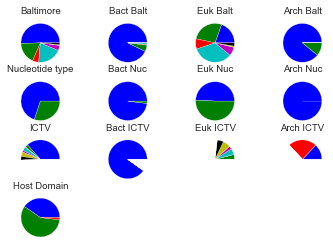

In [27]:
from matplotlib.gridspec import GridSpec

the_grid = GridSpec(4, 4)
def plotMe(row, col, fractions, plotTitle):
    plt.subplot(the_grid[row, col], aspect=1)
    plt.pie(fractions) #labels= majorCats[0:5]+['RNA retroviruses', 'DNA retroviruses'])
    plt.title(plotTitle)
    print(plotTitle, fractions)
    return()

majorCats = ['dsDNA viruses, no RNA stage','ssDNA viruses', 'dsRNA viruses', 'ssRNA positive-strand viruses, no DNA stage', 'ssRNA negative-strand viruses', 'Metaviridae', 'Retroviridae', 'Caulimoviridae','Hepadnaviridae']
#need to see how many viruses don't have any of the category descriptions in their taxonomy so I can exclude these viruses later
x= [virus['folder'] for virus in lengthData if not any(s in virus['englishLineage'] for s in majorCats)]
#the following are the number of viruses belonging to each baltimore classification categories
y= [virus for virus in lengthData if 'dsDNA viruses, no RNA stage' in virus['englishLineage']]
z= [virus for virus in lengthData if 'ssDNA viruses' in virus['englishLineage']]
a= [virus for virus in lengthData if 'dsRNA viruses' in virus['englishLineage']]
o= [virus for virus in lengthData if 'ssRNA positive-strand viruses, no DNA stage' in virus['englishLineage']]
k= [virus for virus in lengthData if 'ssRNA negative-strand viruses' in virus['englishLineage']]
l= [virus for virus in lengthData if 'Metaviridae' in virus['englishLineage'] or 'Retroviridae' in virus['englishLineage']]
m= [virus for virus in lengthData if 'Caulimoviridae' in virus['englishLineage'] or 'Hepadnaviridae' in virus['englishLineage']]

#Baltimore
#the vector containing the number of viruses associated with each baltimore virus category
v= [len(vec) for vec in [y, z, a, o, k, l, m]]
fractions = [round(num/sum(v), 3) for num in v]
plotTitle='Baltimore'
plotMe(0, 0, fractions, plotTitle)

#Nucleotide-Type
#dna viruses are those that are based on DNA nucleotides, dsDNA, ssDNA  viruses and DNA retroviruses, and RNA viruses are +ssRNA, -ssRNA, dsRNA, and RNA retroviruses
dna = y+z+m
rna =a+o+k+l
vv= [len(dna), len(rna)] 
fractions = [round(num/sum(vv), 3) for num in vv]
plotTitle='Nucleotide type'
plotMe(1, 0, fractions, plotTitle)

#ICTV
ictv = ['Caudovirales', 'Herpesvirales', 'Ligamenvirales', 'Mononegavirales', 'Nidovirales','Picornavirales', 'Tymovirales']
#finding out the number of viruses that have any of the ictv categories in their english lineage
b = [len([virus for virus in lengthData if taxon in virus['englishLineage']]) for taxon in ictv]
#finding the number of viruses that don't have any of the ictv categories as part of their english lineage. This is the "unclassified" category. 
bb = len([virus for virus in lengthData if not any(s in virus['englishLineage'] for s in ictv)])
#creating a vector of lengths belonging to each category
bbb=b+[bb]
#to create a piechart need to figure out the fraction of each category
fractions = [round(num/sum(bbb), 3) for num in bbb]
plotTitle='ICTV'
plotMe(2, 0, fractions, plotTitle)

#Host-Domain
hosts = ['Bacteria', 'Eukaryota', 'Archaea']
bac = [virus for virus in lengthData if 'Bacteria' in virus['hostEnglishLineage']]
euk = [virus for virus in lengthData if 'Eukaryota' in virus['hostEnglishLineage']]
arc = [virus for virus in lengthData if 'Archaea' in virus['hostEnglishLineage']]
h= [len(vec) for vec in [bac, euk, arc]]

fractions= [round(num/sum(h), 3) for num in h]
plotTitle='Host Domain'
plotMe(3, 0, fractions, plotTitle)

#Host-Domain & Baltimore 
vb= [[virus for virus in group if 'Bacteria' in virus['hostEnglishLineage']] for group in [y, z, a, o, k, l, m]]
hb= [len(vec) for vec in vb]
fractions= [round(num/sum(hb), 3) for num in hb]
plotTitle='Bact Balt'
plotMe(0, 1, fractions, plotTitle)

ve= [[virus for virus in group if 'Eukaryota' in virus['hostEnglishLineage']] for group in [y, z, a, o, k, l, m]]
he= [len(vec) for vec in ve]
fractions= [round(num/sum(he), 3) for num in he]
plotTitle='Euk Balt'
plotMe(0, 2, fractions, plotTitle)

va= [[virus for virus in group if 'Archaea' in virus['hostEnglishLineage']] for group in [y, z, a, o, k, l, m]]
ha= [len(vec) for vec in va]
fractions= [round(num/sum(ha), 3) for num in ha]
plotTitle='Arch Balt'
plotMe(0, 3, fractions, plotTitle)

#Host-Domain & Nucleotide-type
vnb= [[virus for virus in group if 'Bacteria' in virus['hostEnglishLineage']] for group in [dna,rna]]
nb= [len(vec) for vec in vnb]
fractions= [round(num/sum(nb), 3) for num in nb]
plotTitle='Bact Nuc'
plotMe(1, 1, fractions, plotTitle)

vne= [[virus for virus in group if 'Eukaryota' in virus['hostEnglishLineage']] for group in [dna,rna]]
ne= [len(vec) for vec in vne]
fractions= [round(num/sum(ne), 3) for num in ne]
plotTitle='Euk Nuc'
plotMe(1, 2, fractions, plotTitle)

vna= [[virus for virus in group if 'Archaea' in virus['hostEnglishLineage']] for group in [dna,rna]]
na= [len(vec) for vec in vna]
fractions= [round(num/sum(na), 3) for num in na]
plotTitle='Arch Nuc'
plotMe(1, 3, fractions, plotTitle)

#Host-Domain & ICTV
ib = [len([virus for virus in lengthData if taxon in virus['englishLineage'] and 'Bacteria' in virus['hostEnglishLineage']]) for taxon in ictv]
ub = len([virus for virus in lengthData if not any(s in virus['englishLineage'] for s in ictv) and 'Bacteria' in virus['hostEnglishLineage']])
totb= ib + [ub]
fractions = [round(num/sum(totb), 3) for num in totb]
plotTitle='Bact ICTV'
plotMe(2, 1, fractions, plotTitle)
          
ie = [len([virus for virus in lengthData if taxon in virus['englishLineage'] and 'Eukaryota' in virus['hostEnglishLineage']]) for taxon in ictv]
ue = len([virus for virus in lengthData if not any(s in virus['englishLineage'] for s in ictv) and 'Eukaryota' in virus['hostEnglishLineage']])
tote= ie + [ue]
fractions = [round(num/sum(tote), 3) for num in tote]
plotTitle='Euk ICTV'
plotMe(2, 2, fractions, plotTitle)

ia = [len([virus for virus in lengthData if taxon in virus['englishLineage'] and 'Archaea' in virus['hostEnglishLineage']]) for taxon in ictv]
ua = len([virus for virus in lengthData if not any(s in virus['englishLineage'] for s in ictv) and 'Archaea' in virus['hostEnglishLineage']])
tota= ia + [ua]
fractions = [round(num/sum(tota), 3) for num in tota]
plotTitle='Arch ICTV'
plotMe(2, 3, fractions, plotTitle)

print('Number of bacterial viruses', len(bac))
print('Number of eukaryotic viruses',len(euk))
print('Number of archaeal viruses', len(arc))
print('total number of viruses', sum(v))
  
plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['patch.edgecolor'] = 'w'

#plt.savefig('pieCharts.pdf')


###Plotting distributions of host phyla for Eukaryotic, Bacterial, and Archaeal viruses

The number of viruses fitting in the identified categories (for Eukaryotes):  1384
Total number of eukaryotic viruses:  1384
[804, 567, 7, 3, 3]
Eukaryotic Viruses [0.581, 0.41, 0.005, 0.002, 0.002]
The number of viruses fitting in the identified categories (for Bacteria):  969
Total number of Bacterial viruses:  969
[516, 284, 99, 31, 23, 8, 3, 5]
Bacterial Viruses [0.533, 0.293, 0.102, 0.032, 0.024, 0.008, 0.003, 0.005]
The number of viruses fitting in the identified categories (for Archaea):  46
Total number of Archaeal viruses:  46
[30, 16]
Archaeal Viruses [0.652, 0.348]


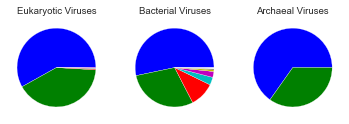

In [101]:
the_grid = GridSpec(1, 3)

#Eukaryotic viruses, identifying the 5 eukaryotic supergroups. 
y= [virus for virus in lengthData if 'Opisthokonta' in virus['hostEnglishLineage']]
#This is the Archaeplastida  supergroup
z= [virus for virus in lengthData if  any(s in virus['hostEnglishLineage'] for s in ['Viridiplantae', 'Haptophyceae'])]
a= [virus for virus in lengthData if 'Amoebozoa' in virus['hostEnglishLineage']]
#This is the SAR supergroup
o= [virus for virus in lengthData if  any(s in virus['hostEnglishLineage'] for s in ['Stramenopiles','Alveolata','Rhizaria'])]
#This is the Excavata supergroup
k= [virus for virus in lengthData if any(s in virus['hostEnglishLineage'] for s in ['Euglenozoa', 'Fornicata', 'Heterolobosea'])]

v= [len(vec) for vec in [y, z, a, o, k]]
print('The number of viruses fitting in the identified categories (for Eukaryotes): ', sum(v))
totalE = len([virus for virus in lengthData if 'Eukaryota' in virus['hostEnglishLineage']])
print('Total number of eukaryotic viruses: ', totalE)
print(v)              
fractions = [round(num/sum(v), 3) for num in v]
plotTitle='Eukaryotic Viruses'
plotMe(0, 0, fractions, plotTitle)


#Bacterial viruses
y= [virus for virus in lengthData if 'Proteobacteria' in virus['hostEnglishLineage']]
z= [virus for virus in lengthData if  'Firmicutes' in virus['hostEnglishLineage']]
a= [virus for virus in lengthData if 'Actinobacteria' in virus['hostEnglishLineage']]
o= [virus for virus in lengthData if any(s in virus['hostEnglishLineage'] for s in ['Bacteroidetes', 'Bacteroidetes/Chlorobi group'])]
k= [virus for virus in lengthData if 'Cyanobacteria' in virus['hostEnglishLineage']]
l= [virus for virus in lengthData if 'Tenericutes' in virus['hostEnglishLineage']]
m= [virus for virus in lengthData if 'Deinococcus-Thermus' in virus['hostEnglishLineage']]
n= [virus for virus in lengthData if 'Chlamydiae/Verrucomicrobia group' in virus['hostEnglishLineage']]

#The following was used to identify the viruses that were not being identified based on our lineage search terms. Eventually, all viruses were identified. 
#identified=y+ z+ a+ o+ k+ l+ m+ n
#q= [virus for virus in lengthData if virus not in identified and 'Bacteria' in virus['hostEnglishLineage']]
#print(len(q))
#print([virus['hostEnglishLineage'] for virus in q])

v= [len(vec) for vec in [y, z, a, o, k, l, m, n]]
print('The number of viruses fitting in the identified categories (for Bacteria): ', sum(v))
totalB = len([virus for virus in lengthData if 'Bacteria' in virus['hostEnglishLineage']])
print('Total number of Bacterial viruses: ', totalB)
print(v)              
fractions = [round(num/sum(v), 3) for num in v]
plotTitle='Bacterial Viruses'
plotMe(0, 1, fractions, plotTitle)

#Archaeal viruses
y= [virus for virus in lengthData if 'Crenarchaeota' in virus['hostEnglishLineage']]
z= [virus for virus in lengthData if  'Euryarchaeota'  in virus['hostEnglishLineage']]

#The following was used to identify the viruses that were not being identified based on our lineage search terms. Eventually, all viruses were identified. 
#identified=y+ z
#q= [virus for virus in lengthData if virus not in identified and 'Archaea' in virus['hostEnglishLineage']]
#print(len(q))
#print([virus['hostEnglishLineage'] for virus in q])

v= [len(vec) for vec in [y, z]]
print('The number of viruses fitting in the identified categories (for Archaea): ', sum(v))
totalA = len([virus for virus in lengthData if 'Archaea' in virus['hostEnglishLineage']])
print('Total number of Archaeal viruses: ', totalA)
print(v)              
fractions = [round(num/sum(v), 3) for num in v]
plotTitle='Archaeal Viruses'
plotMe(0, 2, fractions, plotTitle)


plt.rcParams['pdf.fonttype'] = 42 
plt.rcParams['patch.edgecolor'] = 'w'

plt.savefig('phylaPieCharts.pdf')